<a href="https://colab.research.google.com/github/Aiz782/Students-Performance-Analysis/blob/main/Performance-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental
level of education, Lunch and Test preparation course.

In [ ]:
# 1 Notebook Setup

In [ ]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [ ]:
# Import and read data
data = pd.read_csv("/content/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
# Data Examination
print(data.head())  # Display initial few rows
print(data.info())  # Check for missing values and data types
print(data.describe())  # Explore basic statistics
print(data.duplicated().sum())  # Check for duplicates
data.shape #rows and columns

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

(1000, 8)

In [ ]:
# Finding number of unique categories under each column
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:

# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [ ]:
# 2 Feature Engineering

In [ ]:
# Derive new features like 'Percentage' and 'Grade' based on existing score columns
data['total score'] = (data['math score'] + data['reading score'] + data['writing score'])
data['Percentage'] = data['total score']/3
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

data['Grade'] = data['Percentage'].apply(get_grade)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,F
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,D
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,C


In [ ]:
#finding students with full marks in Maths,reading and writing
reading_full = data[data['reading score'] == 100]['Percentage'].count()
writing_full = data[data['writing score'] == 100]['Percentage'].count()
math_full = data[data['math score'] == 100]['Percentage'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [ ]:
#finding number of students with less than 20 marks in Maths,Writing and Reading
reading_less_20 = data[data['reading score'] <= 20]['Percentage'].count()
writing_less_20 = data[data['writing score'] <= 20]['Percentage'].count()
math_less_20 = data[data['math score'] <= 20]['Percentage'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


In [ ]:
# Exploring Data ( Visualization )
# Visualize average score distribution to make some conclusion.

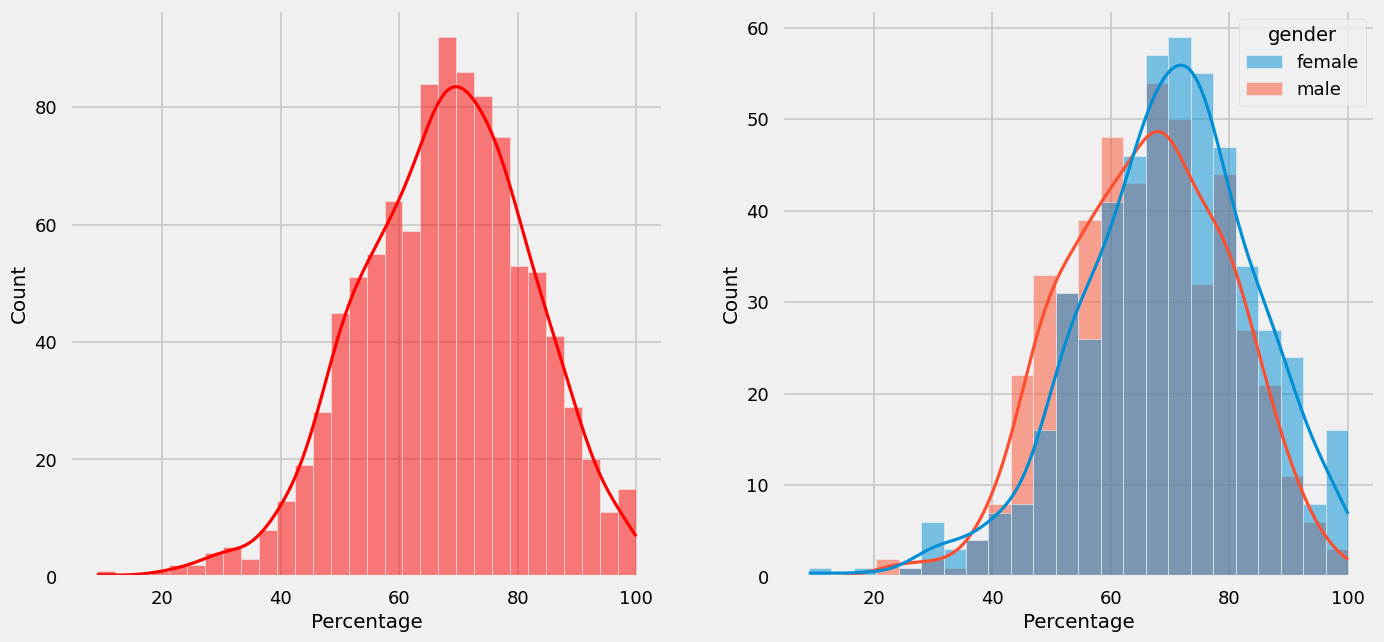

In [ ]:
# Percentage score for male and female comparision
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Percentage',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=data,x='Percentage',kde=True,hue='gender')
plt.show()

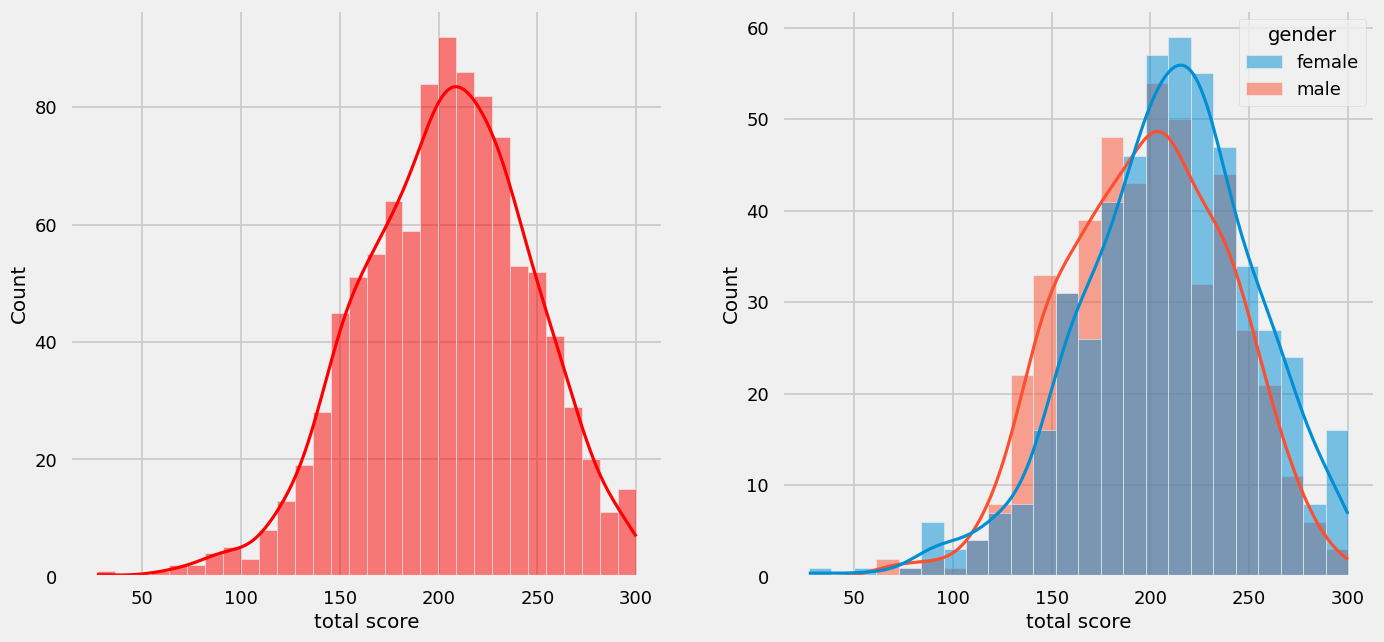

In [ ]:
# Total score for male and female comparision
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=data,x='total score',kde=True,hue='gender')
plt.show()

In [ ]:
#Insights
#Female students tend to perform well then male students.

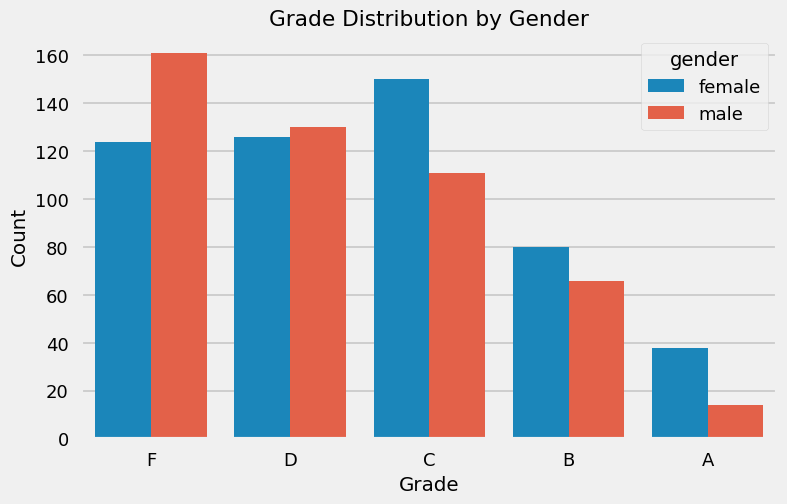

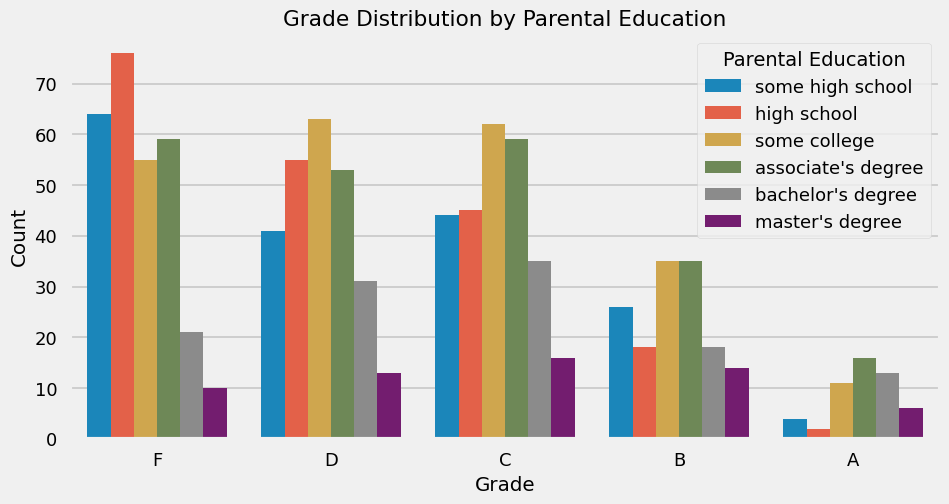

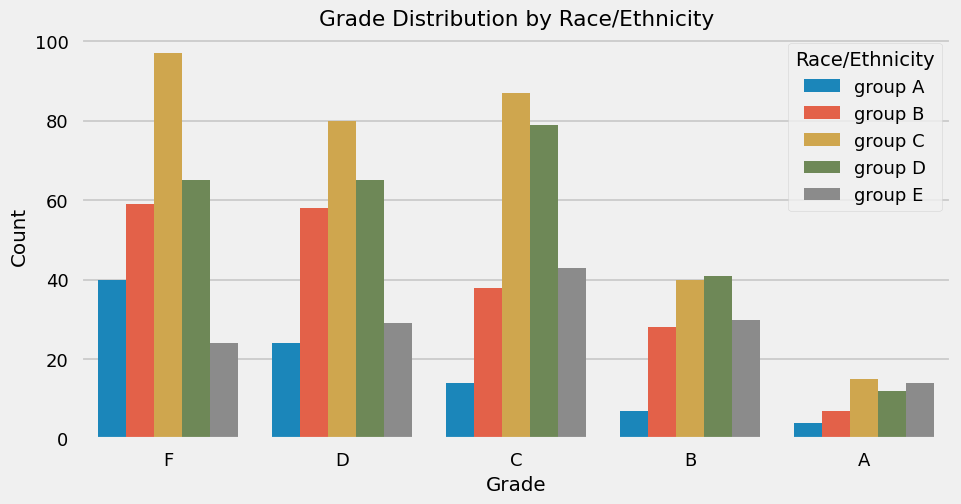

In [ ]:
# Gender vs. Grade
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', hue='gender', data=data, order=['F', 'D', 'C', 'B', 'A'])
plt.title('Grade Distribution by Gender')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Parental Education vs. Grade
plt.figure(figsize=(10, 5))
sns.countplot(x='Grade', hue='parental level of education', data=data,
              order=['F', 'D', 'C', 'B', 'A'], hue_order=['some high school', 'high school', 'some college',
                                                         "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Grade Distribution by Parental Education')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Parental Education')
plt.show()

# Race/Ethnicity vs. Grade
plt.figure(figsize=(10, 5))
sns.countplot(x='Grade', hue='race/ethnicity', data=data,
              order=['F', 'D', 'C', 'B', 'A'], hue_order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.title('Grade Distribution by Race/Ethnicity')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Race/Ethnicity')
plt.show()

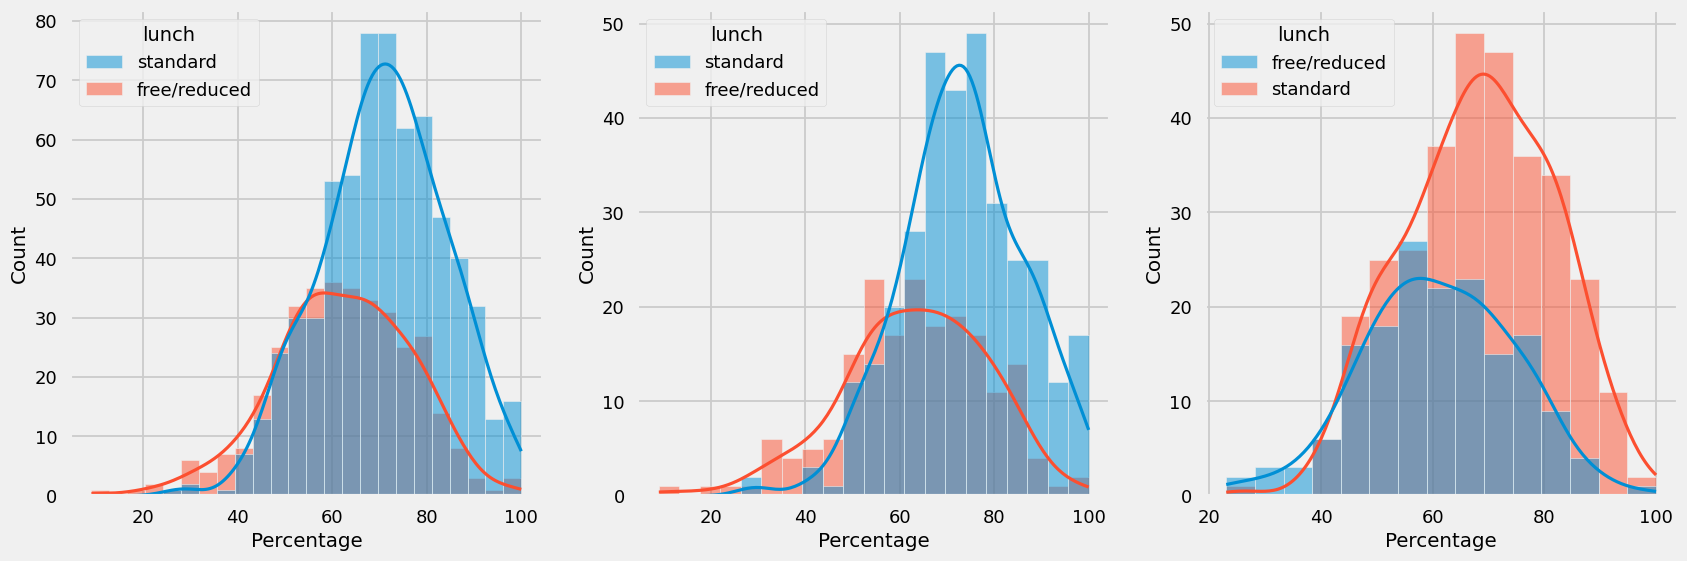

In [ ]:
# Lunch and Percentage comparision
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Percentage',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='Percentage',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Percentage',kde=True,hue='lunch')
plt.show()

In [ ]:
# Insights
# Standard lunch helps perform well in exams.
# Standard lunch helps perform well in exams be it a male or a female.

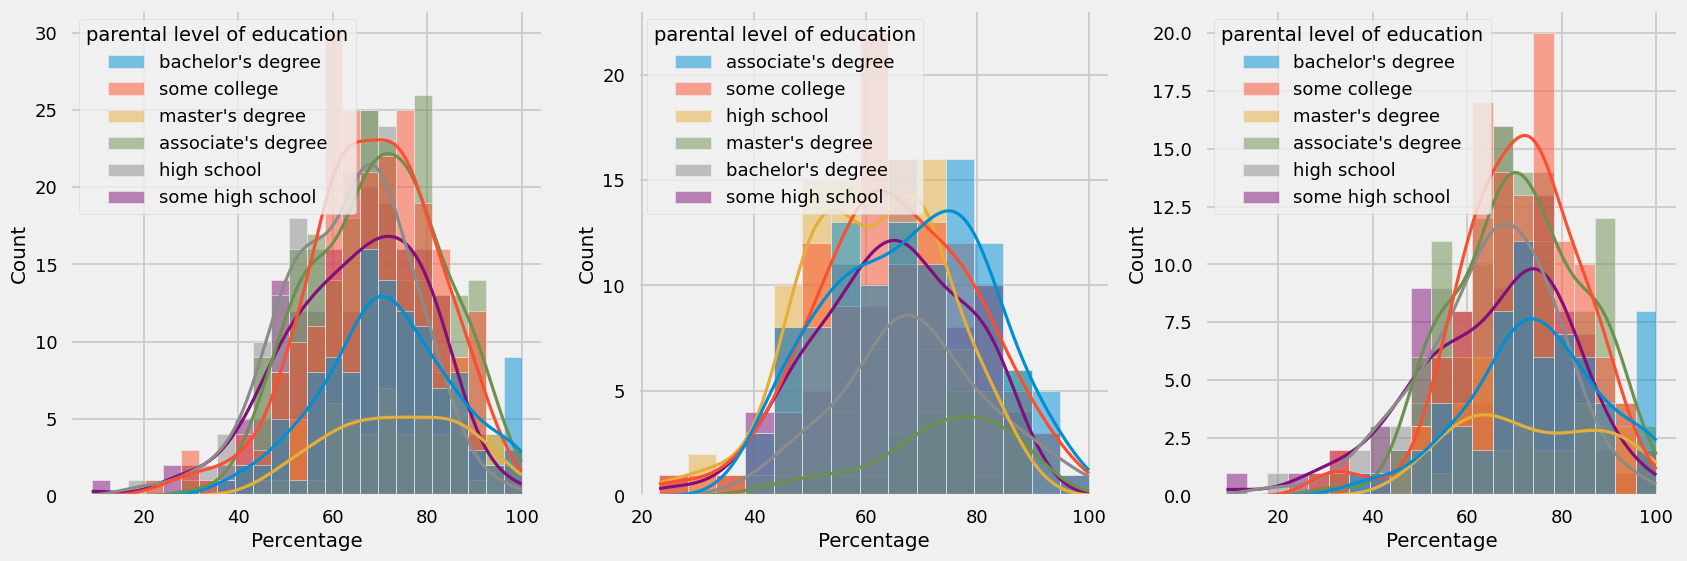

In [ ]:
#Parental level education and percentage comparision
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='Percentage',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='Percentage',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='Percentage',kde=True,hue='parental level of education')
plt.show()

In [ ]:
# Insights
# In general parent's education don't help student perform well in exam.
# 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
# 3rd plot we can see there is no effect of parent's education on female students.

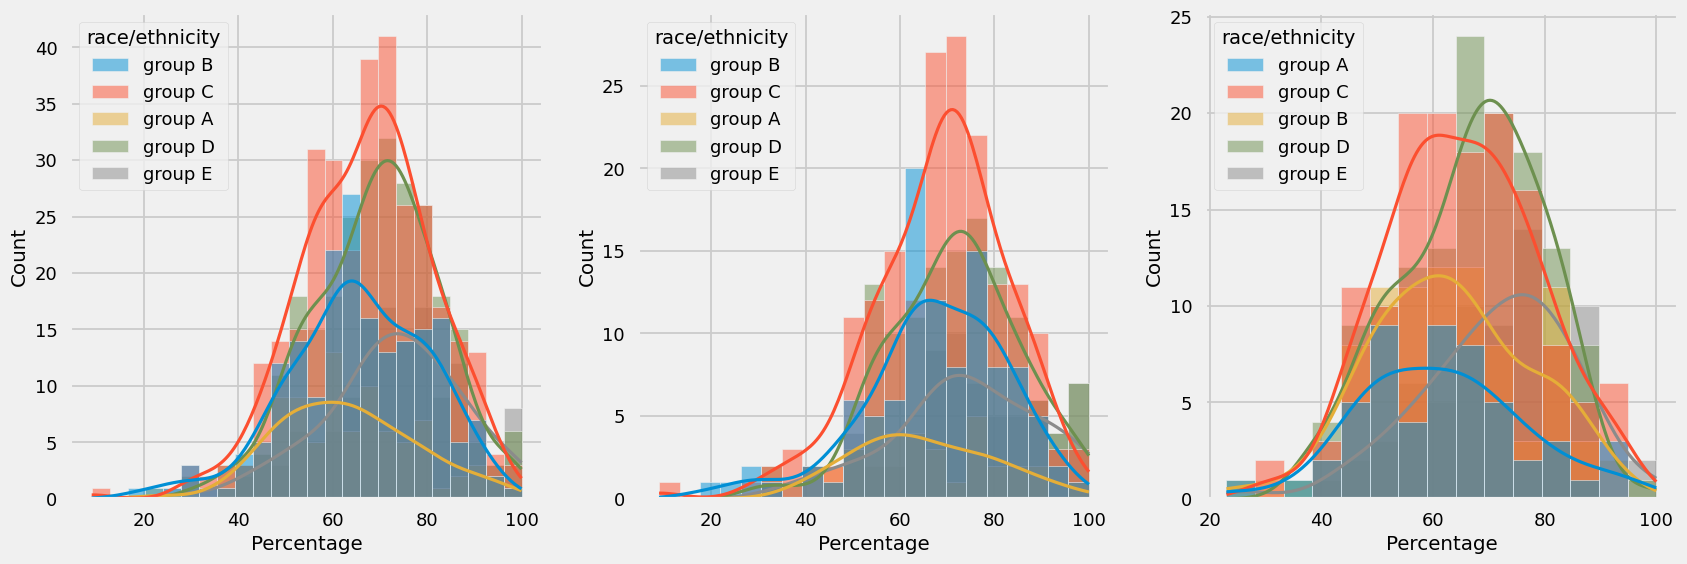

In [ ]:
#Race/ethnicity and percentage comparision
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='Percentage',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='Percentage',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='Percentage',kde=True,hue='race/ethnicity')
plt.show()

In [ ]:
# Insights
# Students of group A and group B tends to perform poorly in exam.
# Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

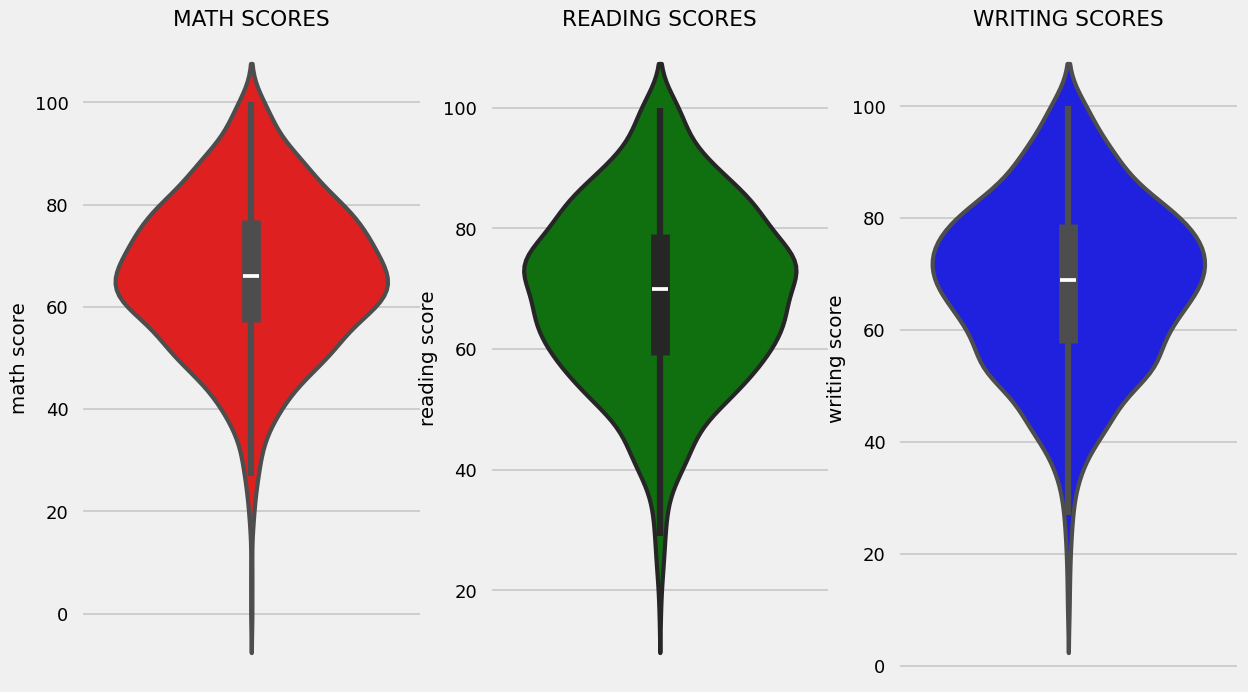

In [ ]:
#Subject wise comparisions
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

In [ ]:

# Insights
# From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

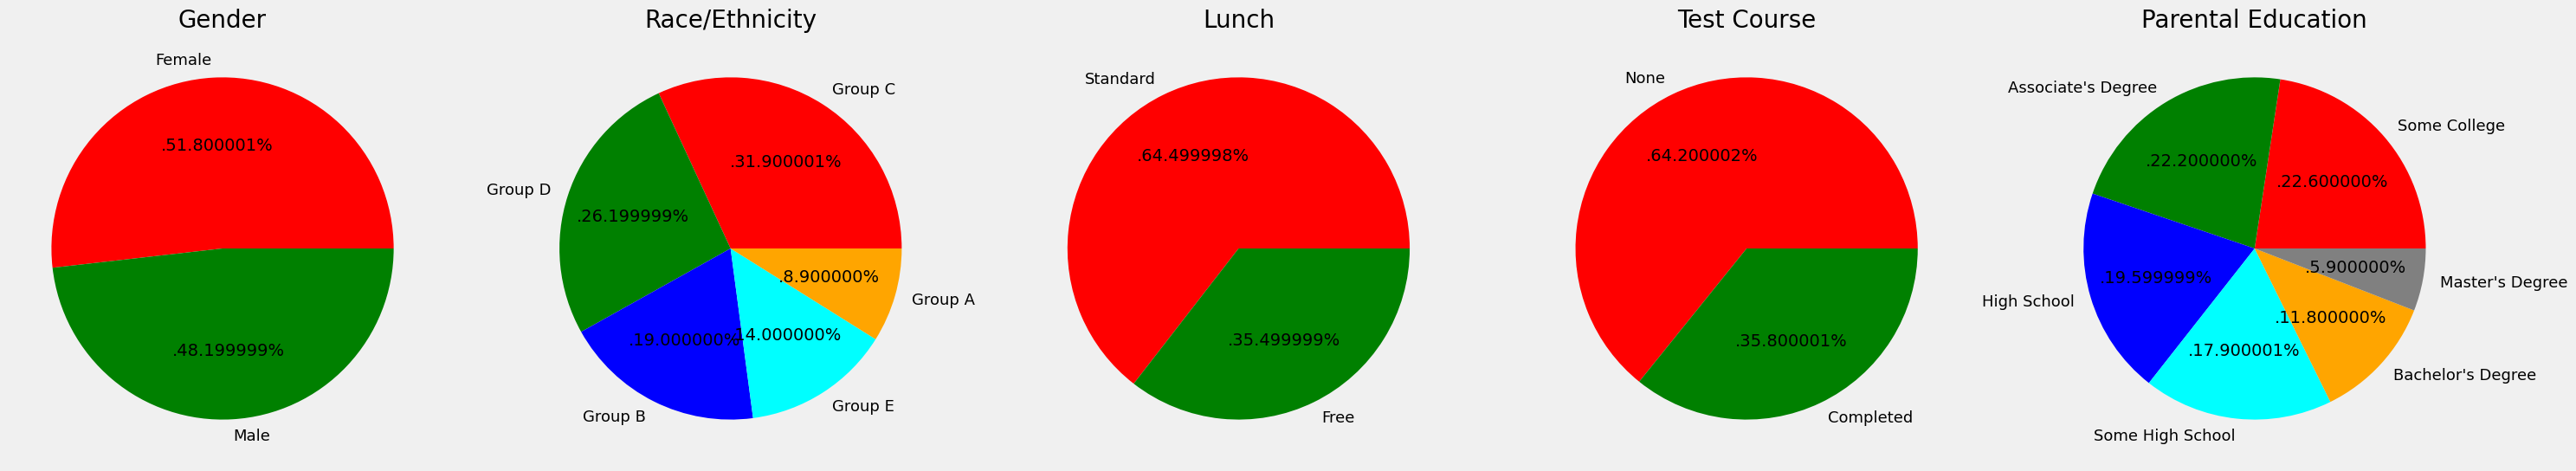

In [ ]:
#percentage of audience in each segment
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [ ]:
# Insights
# Number of Male and Female students is almost equal
# Number students are greatest in Group C
# Number of students who have standard lunch are greater
# Number of students who have not enrolled in any test preparation course is greater
# Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

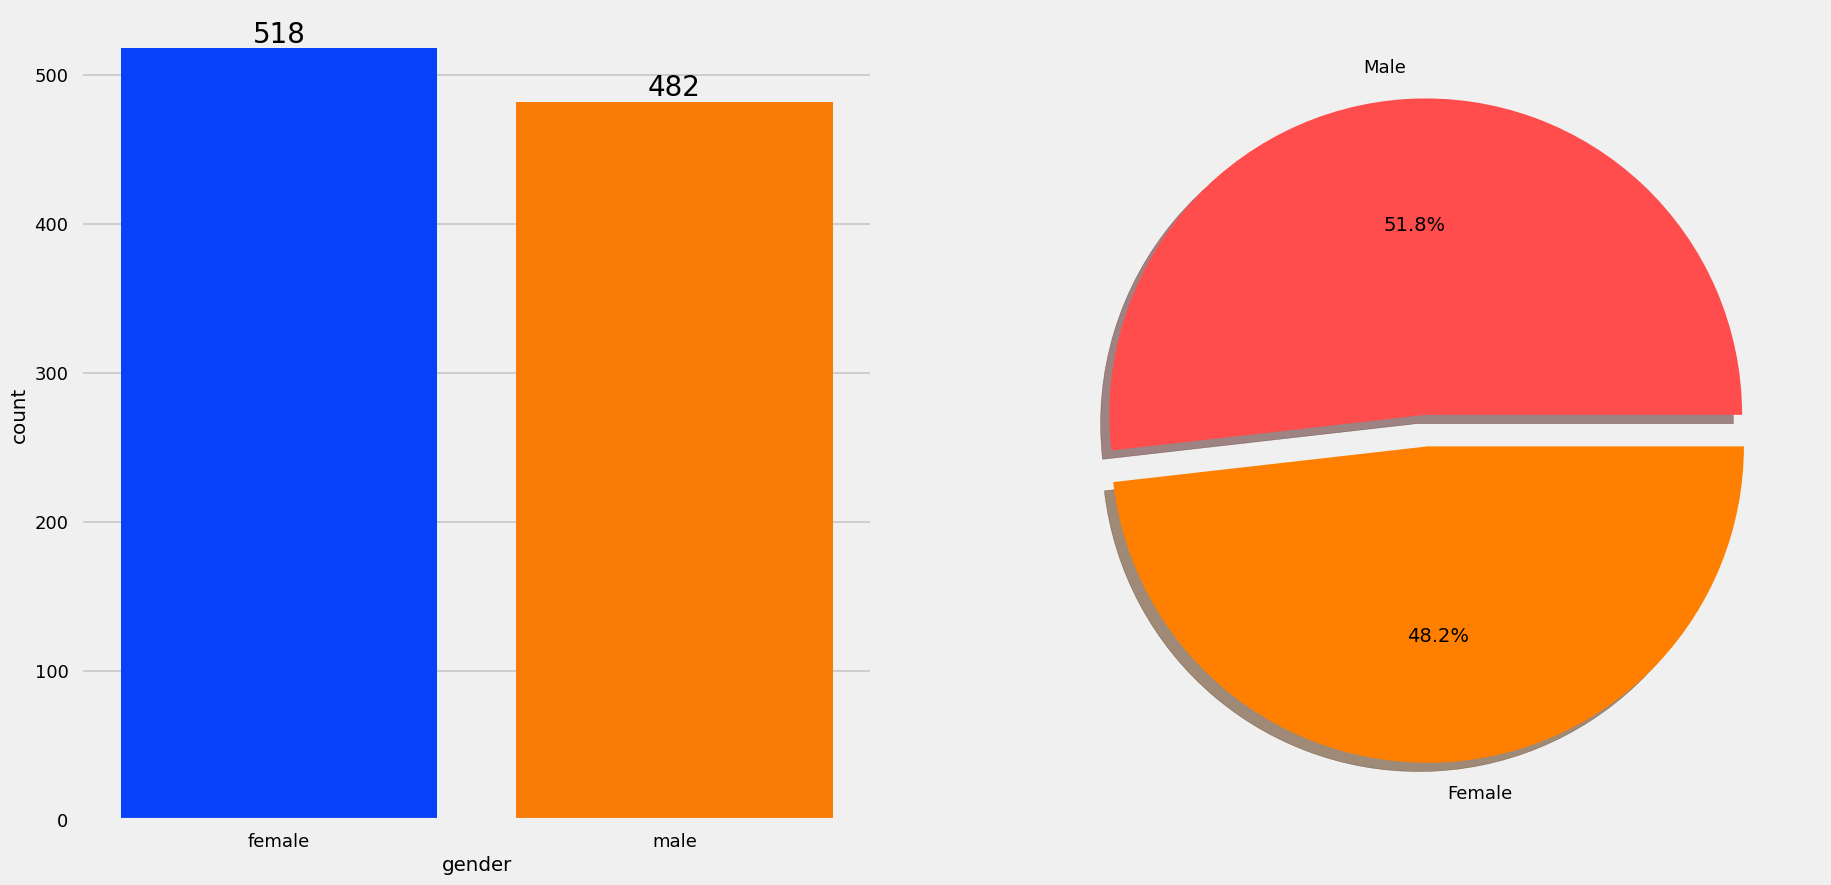

In [ ]:
#MAle and female count
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [ ]:
gender_groups = data.groupby('gender').mean
gender_groups

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7a8f1cba81c0>>

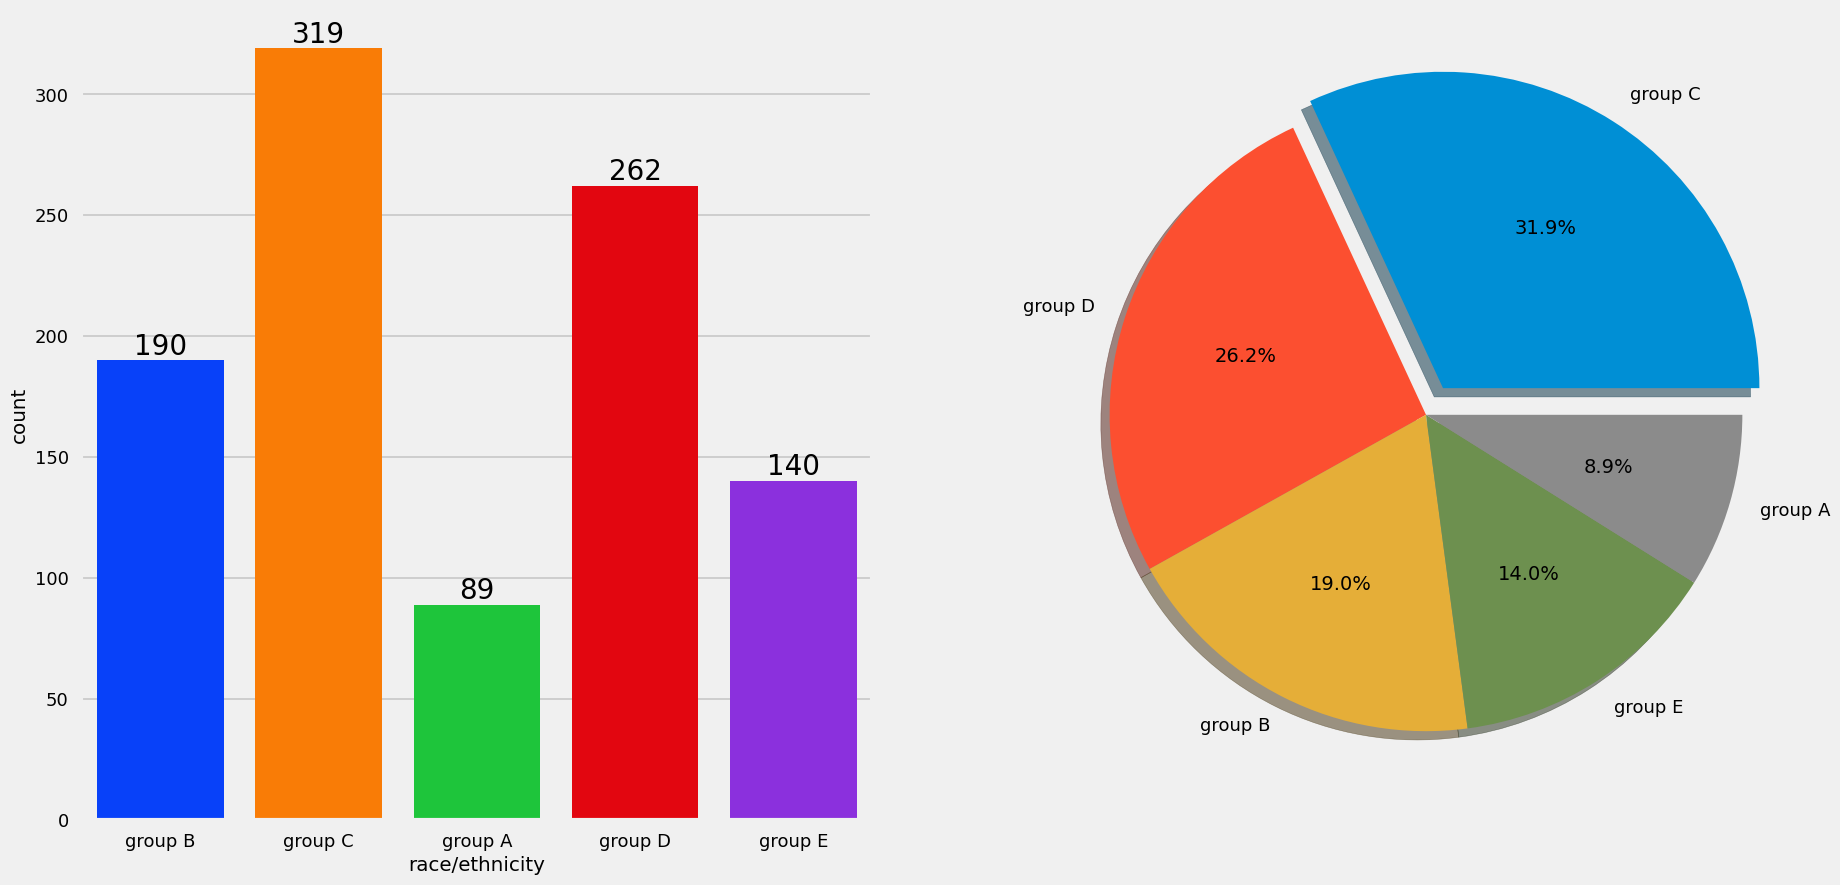

In [ ]:
#Race and ethnicity count
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race/ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = data['race/ethnicity'].value_counts(),labels=data['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
# Insights
# Most of the student belonging from group C /group D.
# Lowest number of students belong to groupA.

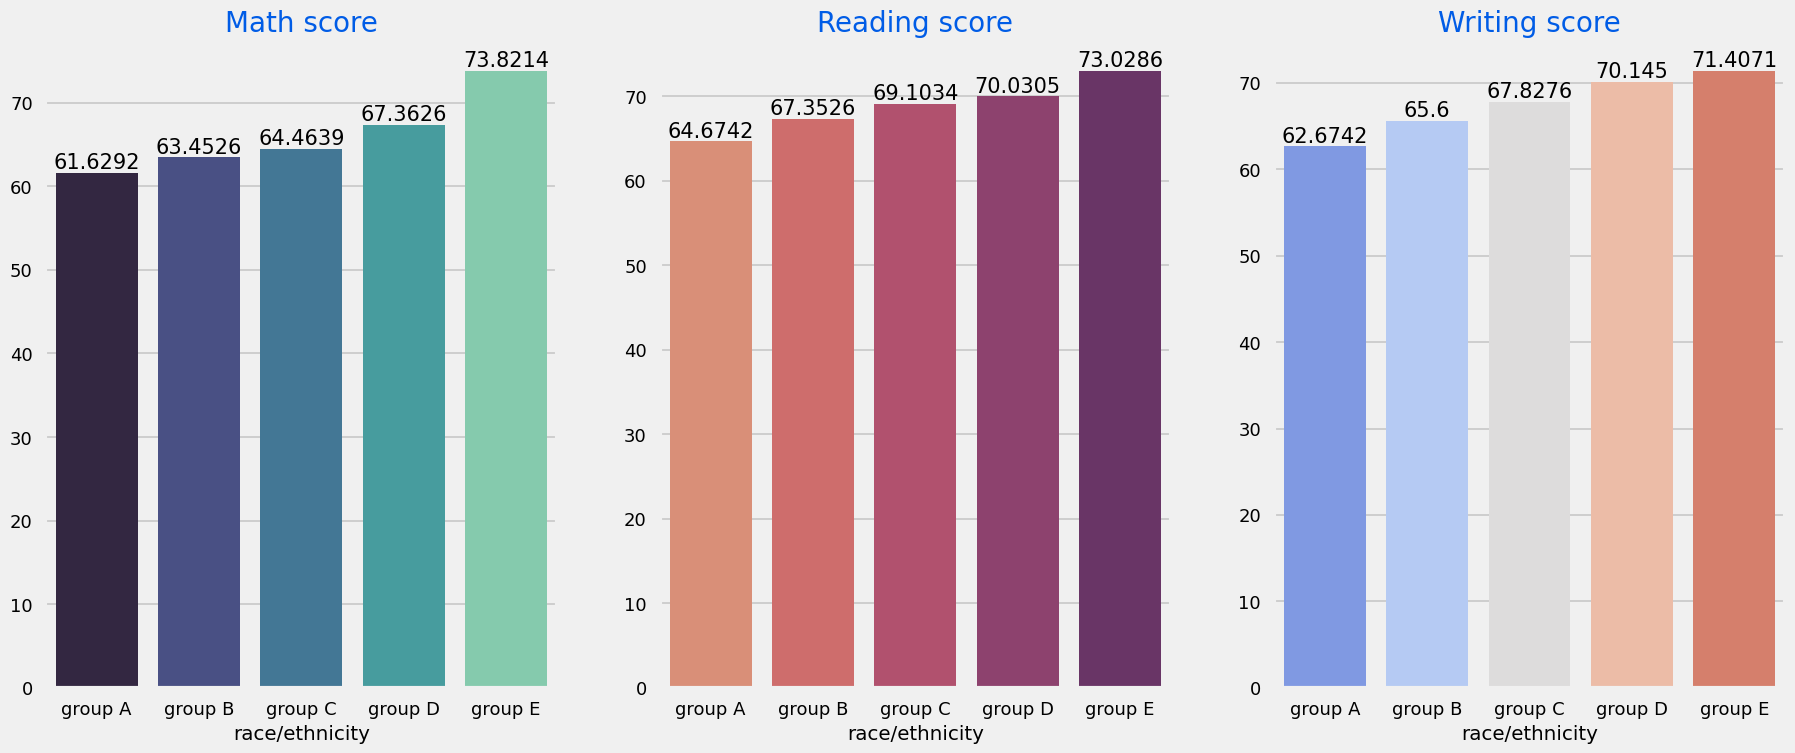

In [ ]:
#Scores based on ethnicity/race in each subject
Group_data2=data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [ ]:
# Insights
# Group E students have scored the highest marks.
# Group A students have scored the lowest marks.
# Students from a lower Socioeconomic status have a lower avg in all course subjects

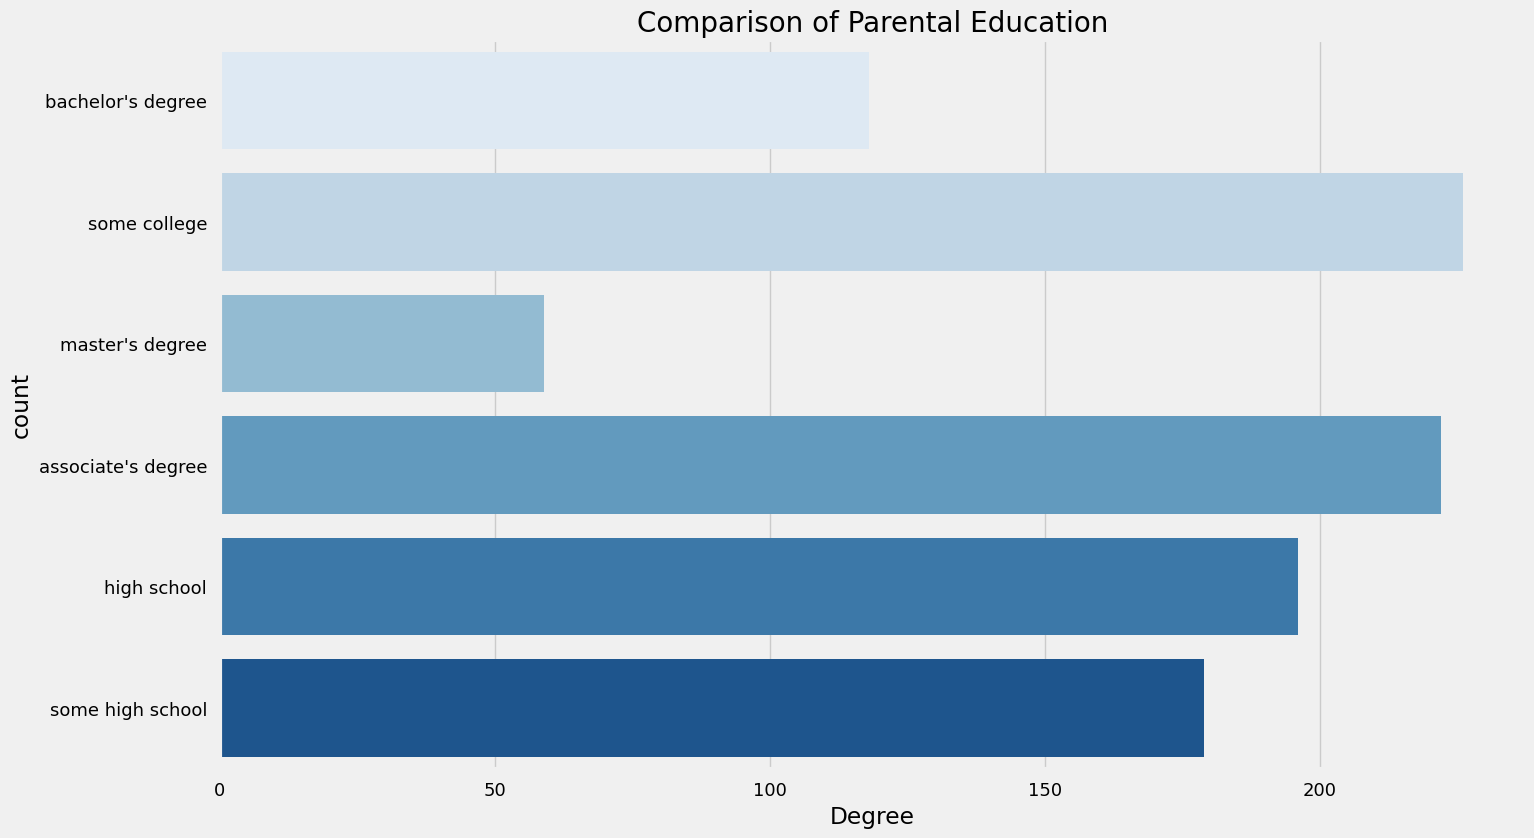

In [ ]:
#Comparison of Parental Education
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [ ]:
# Insights
# Largest number of parents are from some high school.

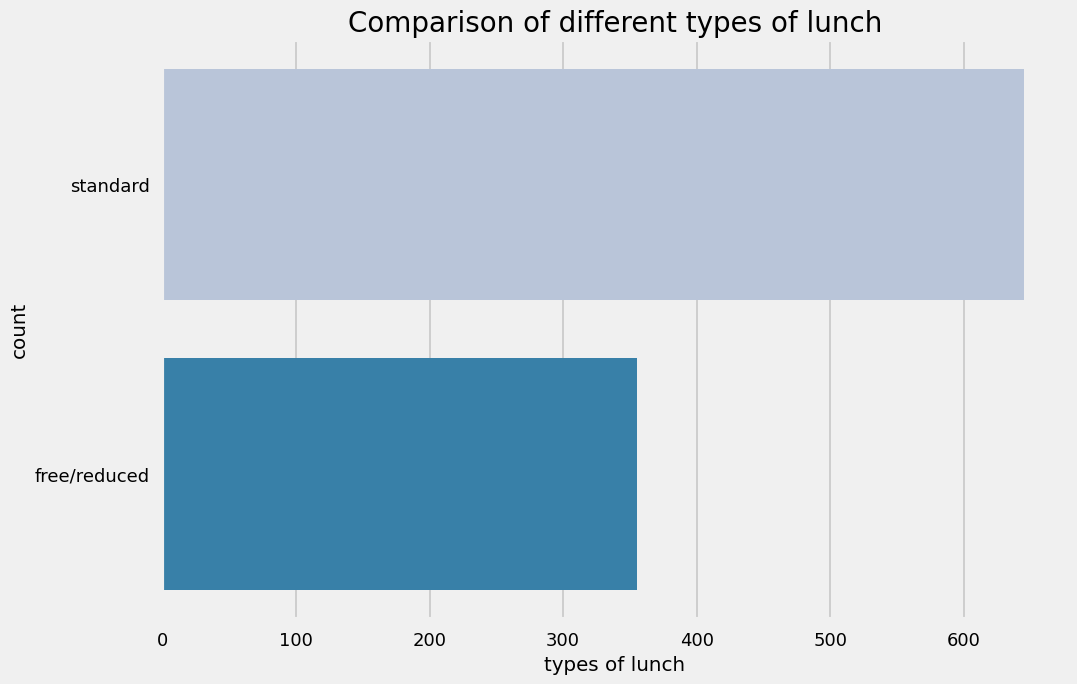

In [ ]:
#Comparison of different types of lunch
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

In [ ]:
# Insights
# Students being served Standard lunch was more than free lunch

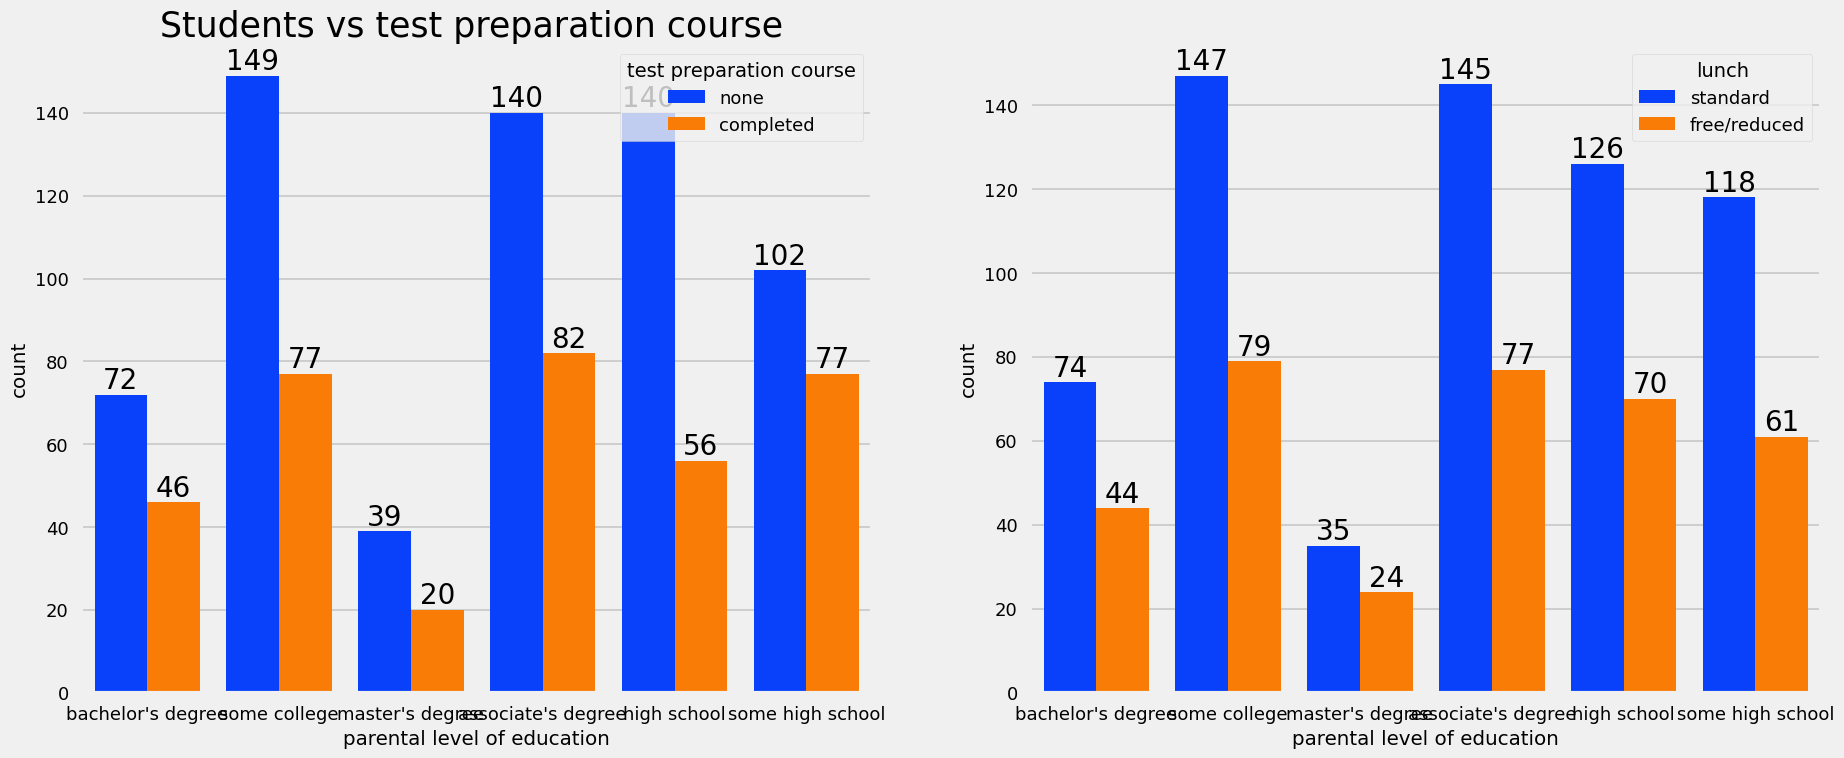

In [ ]:
#Students vs test preparation course
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=data['parental level of education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

In [ ]:
# Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

<Axes: xlabel='lunch', ylabel='writing score'>

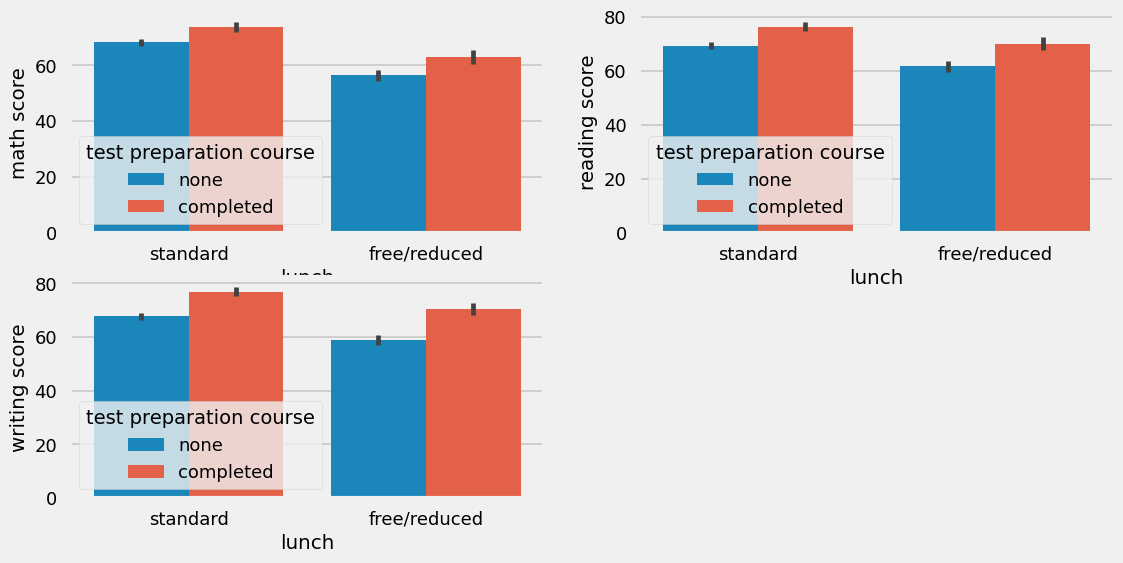

In [ ]:
# Based on test preparation course score for individual subject
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math score'], hue=data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading score'], hue=data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing score'], hue=data['test preparation course'])

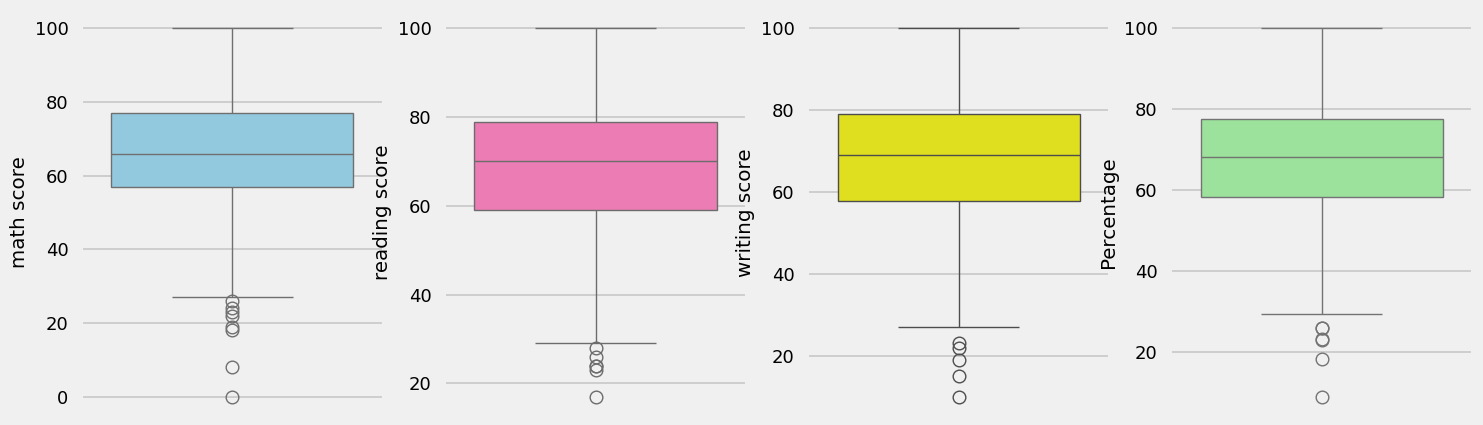

In [ ]:

#comparing individual scores with
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Percentage'],color='lightgreen')
plt.show()

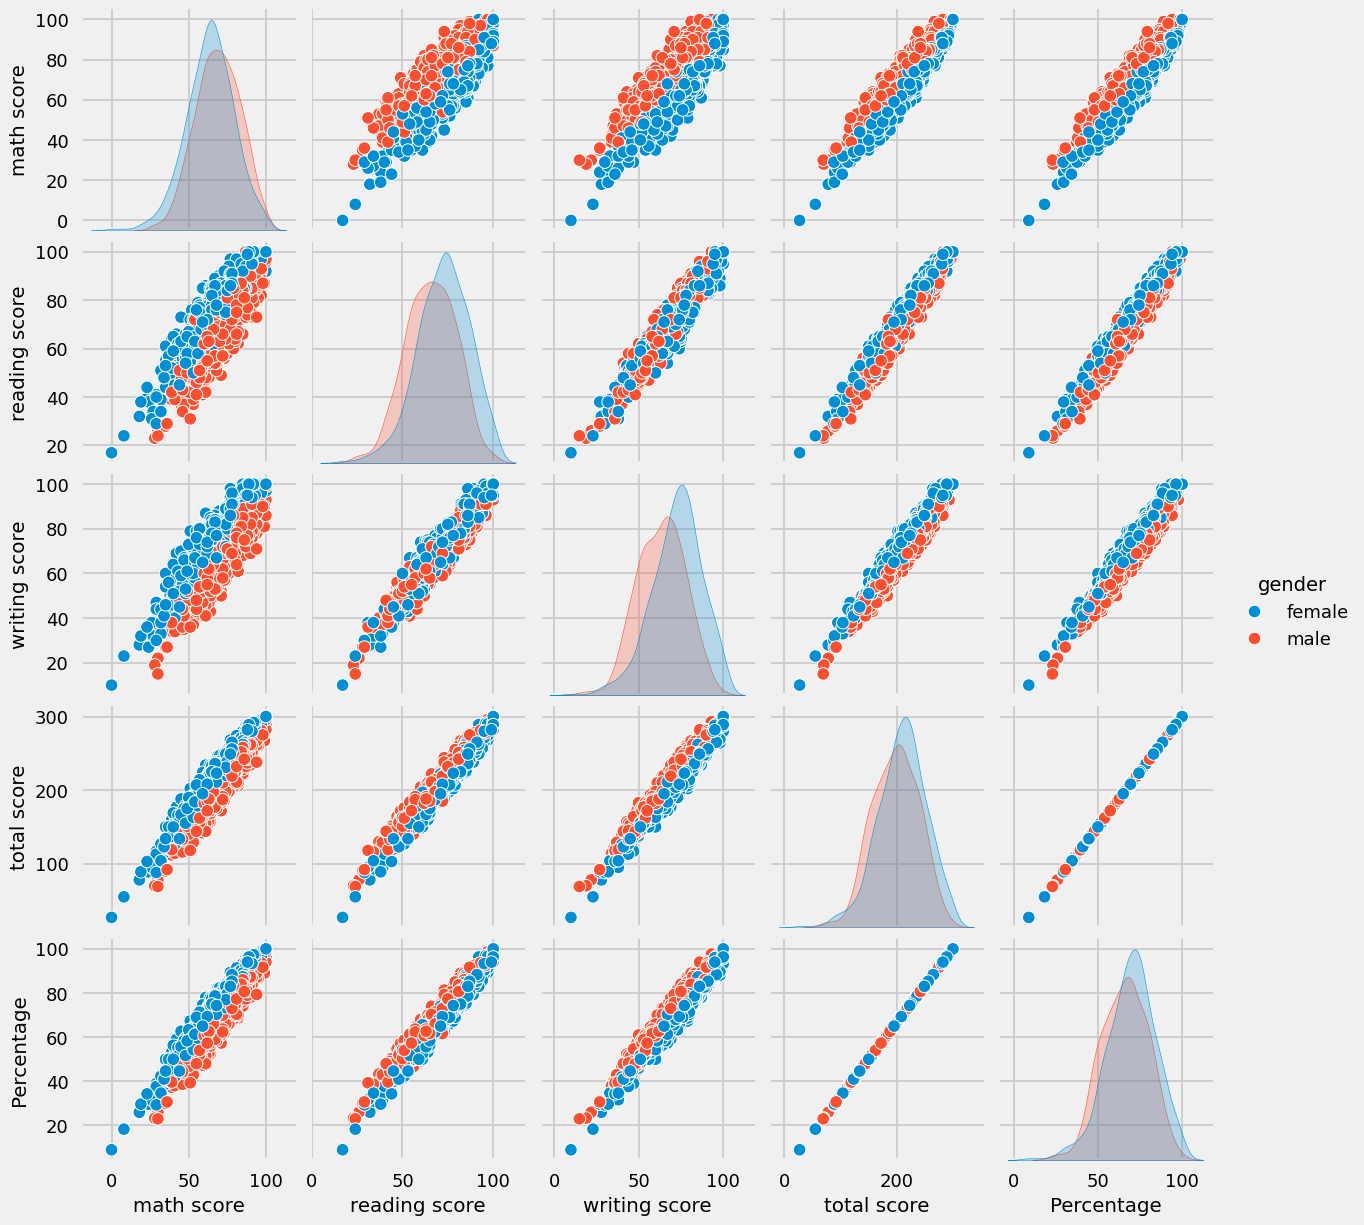

In [ ]:

sns.pairplot(data,hue = 'gender')
plt.show()

In [ ]:
# Insights
# From the above plot it is clear that all the scores increase linearly with each other.

In [ ]:
# Conclusions
# Student's Performance is related with lunch, race, parental level education
# Females lead in pass percentage and also are top-scorers
# Student's Performance is not much related with test preparation course
# Finishing preparation course is benefitial.

In [ ]:
# Transformation Pipeline

# Custom Encoder: Implement a custom ordinal encoder for specific categorical columns
class CustomOrdinalEncoder:
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, map_dict in self.mapping.items():
            X_copy[col] = X_copy[col].map(map_dict)
        return X_copy

# Define ordinal mapping for parental level of education
parental_mapping = {'some high school': 1, 'high school': 2, 'some college': 3,
                    "associate's degree": 4, "bachelor's degree": 5, "master's degree": 6}

#  Pipeline Creation: Create a transformation pipeline for numerical, ordinal, and categorical features
numerical_features = ['math score', 'reading score', 'writing score']
ordinal_features = ['parental level of education']
categorical_features = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']

# Define the transformation pipeline
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

ordinal_pipeline = Pipeline([
    ('encoder', CustomOrdinalEncoder(mapping=parental_mapping))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

# Combine all pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('ord', ordinal_pipeline, ordinal_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [ ]:
X = data.drop(columns=['math score','total score','Grade','Percentage'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
y = data['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
#MODEL DEVELOPMENT

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [ ]:
# Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
# Implementing Linear regession,Lasso,ridge,K-Neighbours Regressor,Decission tree,Random forest Regressor,XGB Regressor,AdaBoost Regressor

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854533
7,AdaBoost Regressor,0.852176
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.767279


In [ ]:
# Determine accuracy of the model
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


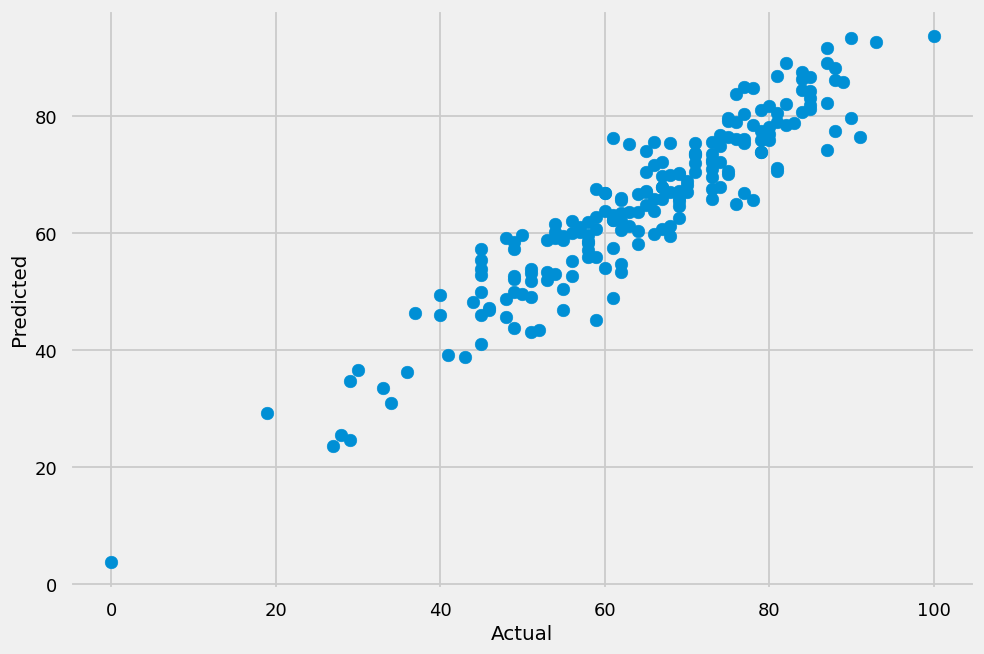

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

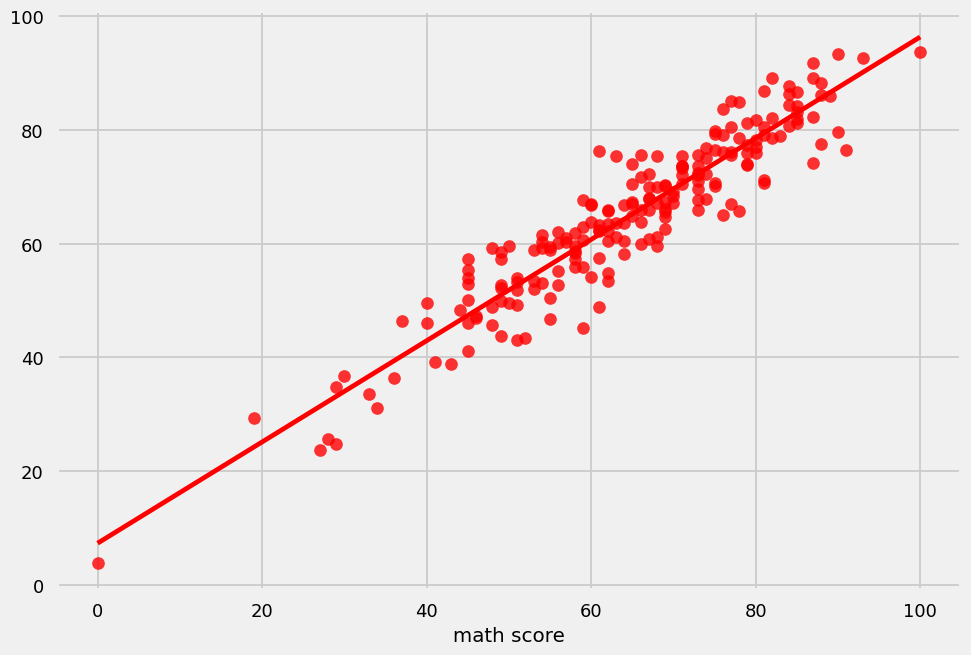

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_data=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_data

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [ ]:
# Therefore above is the predicted results and error